In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_data = pd.read_csv('titanic.csv')

In [2]:
missing_values = titanic_data.isna().sum()
print(missing_values)

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64


In [3]:
 #fill missing values in the 'age' column with the mean age:
titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)

In [4]:
#dropping missing values in the 'embarked' column
titanic_data.dropna(subset=['embarked'], inplace=True)

In [5]:
print(titanic_data.dtypes)

sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
class        object
who          object
alone          bool
survived      int64
dtype: object


In [6]:
#label encoding for 'class' column (ordinal category)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_data['class'] = label_encoder.fit_transform(titanic_data['class'])

In [7]:
#one hot encoding for 'sex' column (nominal category)
titanic_data = pd.get_dummies(titanic_data, columns=['sex'], drop_first=True)

In [8]:
#column names change after one hot encoding
print(titanic_data.columns)

Index(['age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'alone',
       'survived', 'sex_male'],
      dtype='object')


In [9]:
X = titanic_data[['class', 'sex_male', 'age', 'fare']]
y = titanic_data['survived']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.02%


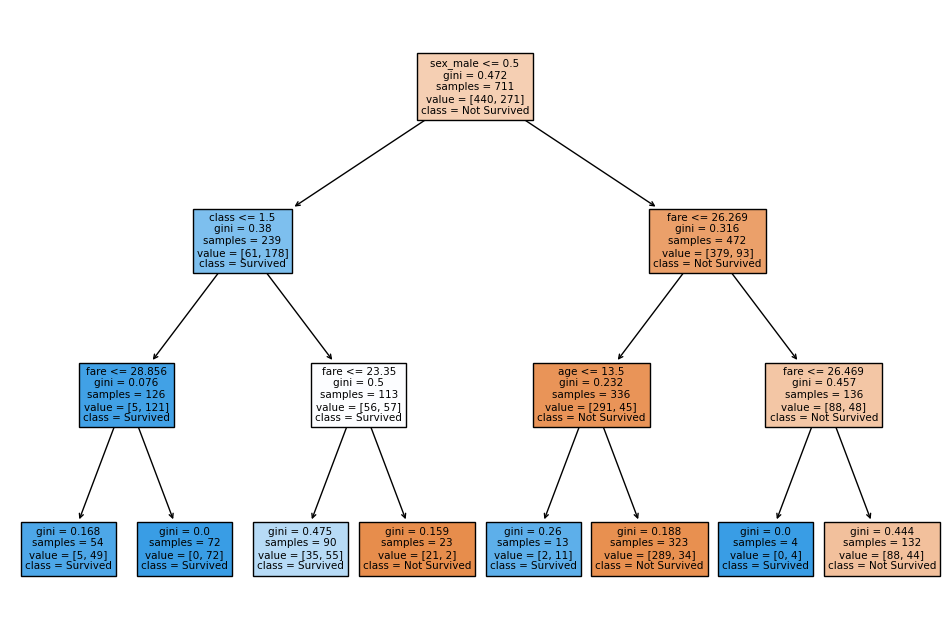

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.13058662725665182
R-squared: 0.44987279643667655


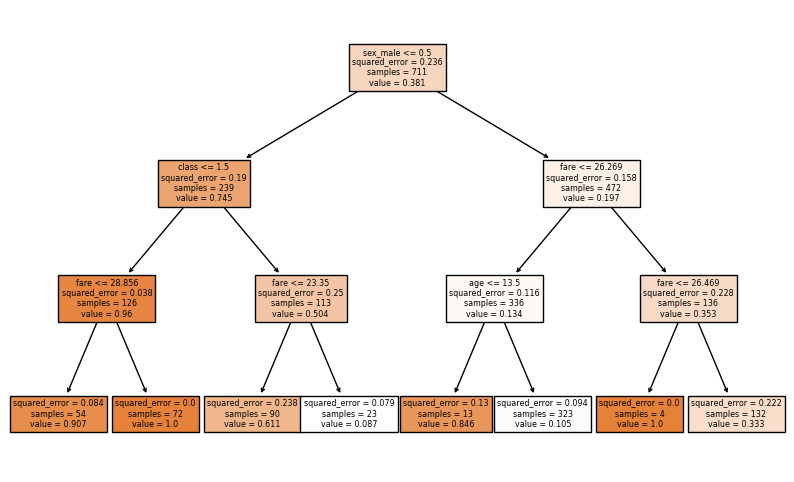

In [18]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

ValueError: x and y must be the same size

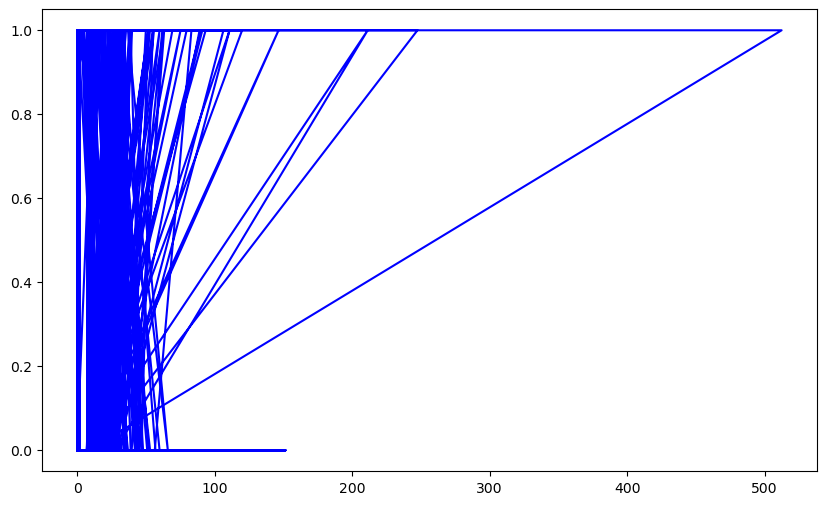

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, y_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - y_pred) ** 2) / n_test)
)
plt.show()